# Importing Libraries

In [1]:
%matplotlib inline 
import math
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
df_original = pd.read_csv("../dataset/ratings_Electronics.csv", header=None)

In [3]:
df = df_original.copy()

In [4]:
#Check the shape
df.shape

(7824482, 4)

In [5]:
#Check column names and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
0    object
1    object
2    float64
3    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
#Sample data
df.head()
df.tail()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


,0,1,2,3
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [7]:
#Check for null values
df.isnull().values.any()
df.isnull().sum().sum()
df.isna().values.any()
df.isna().sum().sum()

False

0

False

0

In [8]:
#Describe the data
df.describe()

,2,3
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [9]:
#Using the column names from question
df.columns = ["userId","productId","ratings","timestamp"]
df.columns

Index(['userId', 'productId', 'ratings', 'timestamp'], dtype='object')

In [10]:
#Drop timestamp column
df.drop(columns = "timestamp",inplace =True,axis =1)

In [11]:
#Explore this later
#min_book_ratings = 50
#filter_books = df['productId'].value_counts() > min_book_ratings
#filter_books = filter_books[filter_books].index.tolist()

#min_user_ratings = 50
#filter_users = df['userId'].value_counts() > min_user_ratings
#filter_users = filter_users[filter_users].index.tolist()

In [12]:
df_userId=df.groupby(['userId']).count().reset_index().rename(columns = {'ratings': 'RatingsCount', 
                                                                        'productId': 'ProductCount'})


In [13]:
df_userId.head()
df.head()

,userId,ProductCount,RatingsCount
0,A00000262KYZUE4J55XGL,1,1
1,A000063614T1OE0BUSKUT,2,2
2,A00009182QVLSWIGHLS1B,1,1
3,A00009661LC9LQPGKJ24G,1,1
4,A00010809P09NUU6ZP6H,1,1


,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [14]:
#Explore the data - count of values
df.apply(lambda x: len(x.unique()))
df["ratings"].unique()
len(df_userId['RatingsCount'].unique())
len(df_userId['ProductCount'].unique())




userId       4201696
productId     476002
ratings            5
dtype: int64

array([5., 1., 3., 2., 4.])

215

215

In [15]:
#Extract users who has given 50 or more ratings. 
#(df_userId.rating > 50).count()
#df["rating"].unique()
#df_userId["rating"].unique()
df_users_50ratings = df_userId.loc[df_userId["RatingsCount"]>=50]
#(df_userId["RatingsCount"] >50).count()


In [16]:
df_users_50ratings.head()
df_users_50ratings.shape

,userId,ProductCount,RatingsCount
5506,A100UD67AHFODS,116,116
5558,A100WO06OQR8BQ,132,132
9928,A105S56ODHGJEK,68,68
9965,A105TOJ6LTVMBG,71,71
13836,A10AFVU66A79Y1,65,65


(1540, 3)

In [17]:

#Users who has provided high number of ratings. 
df_users_50ratings.sort_values('RatingsCount', ascending=False)[:10]


,userId,ProductCount,RatingsCount
3263531,A5JLAU2ARJ0BO,520,520
3512451,ADLVFFE4VBT8,501,501
2989526,A3OXHLG6DIBRW8,498,498
3291008,A6FIAB28IS79,431,431
3284634,A680RUE1FDO8B,406,406
755206,A1ODOGXEYECQQ8,380,380
2424036,A36K2N527TXXJN,314,314
1451394,A2AY4YUOX2N1BQ,311,311
4100926,AWPODHOB4GFWL,308,308
3935038,ARBKYIVNYWK3C,296,296


In [18]:
df_filtered = pd.merge(df, df_users_50ratings, on='userId', how='inner')

In [19]:
df_filtered.shape
df_filtered.head()
len(df_filtered['ProductCount'].unique())
len(df_filtered['RatingsCount'].unique())

(125871, 5)

,userId,productId,ratings,ProductCount,RatingsCount
0,A3BY5KCNQZXV5U,0594451647,5.0,50,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50,50


166

166

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B380771710>]],
      dtype=object)

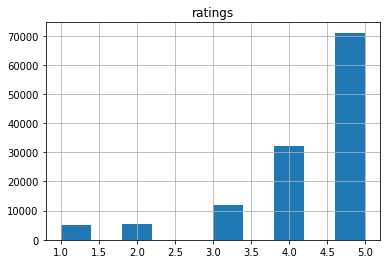

In [20]:
df_filtered.hist(column="ratings")
plt.show()

In [21]:
df_filtered.head()
df_filtered.info()
df_filtered.ratings=df_filtered.ratings.astype('int64')

df_filtered.info()

,userId,productId,ratings,ProductCount,RatingsCount
0,A3BY5KCNQZXV5U,0594451647,5.0,50,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50,50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 5 columns):
userId          125871 non-null object
productId       125871 non-null object
ratings         125871 non-null float64
ProductCount    125871 non-null int64
RatingsCount    125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 5 columns):
userId          125871 non-null object
productId       125871 non-null object
ratings         125871 non-null int64
ProductCount    125871 non-null int64
RatingsCount    125871 non-null int64
dtypes: int64(3), object(2)
memory usage: 5.8+ MB


In [22]:
df_filtered.columns = ['userId', 'productId', 'ratings', 'ProductCount', 'RatingsCount']
df_filtered.columns
print(df_filtered.columns.tolist())


Index(['userId', 'productId', 'ratings', 'ProductCount', 'RatingsCount'], dtype='object')

['userId', 'productId', 'ratings', 'ProductCount', 'RatingsCount']


# Collaborative Filtering model

In [24]:
df_filtered.shape
df_filtered.info()
df_filtered.head()

(125871, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 5 columns):
userId          125871 non-null object
productId       125871 non-null object
ratings         125871 non-null int64
ProductCount    125871 non-null int64
RatingsCount    125871 non-null int64
dtypes: int64(3), object(2)
memory usage: 5.8+ MB


,userId,productId,ratings,ProductCount,RatingsCount
0,A3BY5KCNQZXV5U,0594451647,5,50,50
1,A3BY5KCNQZXV5U,B00000JD4V,4,50,50
2,A3BY5KCNQZXV5U,B000063574,5,50,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5,50,50
4,A3BY5KCNQZXV5U,B0007Y794O,5,50,50


In [25]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

Converting Pandas Dataframe to Surpise format

In [26]:
data = Dataset.load_from_df(df_filtered[['userId', 'productId', 'ratings']], reader)

In [29]:
benchmark = []
# Iterate over all algorithms
#for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
for algorithm in [NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    print(algorithm)
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.981507,0.289805,0.215443
KNNBaseline,1.044691,0.375221,0.869614
KNNWithMeans,1.067907,0.140309,0.808750
KNNWithZScore,1.068268,0.210059,0.831596
CoClustering,1.088208,4.319971,0.286716
KNNBasic,1.115187,0.128281,0.804280
NormalPredictor,1.363172,0.125696,0.269149


In [30]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.981507,0.289805,0.215443
KNNBaseline,1.044691,0.375221,0.869614
KNNWithMeans,1.067907,0.140309,0.808750
KNNWithZScore,1.068268,0.210059,0.831596
CoClustering,1.088208,4.319971,0.286716
KNNBasic,1.115187,0.128281,0.804280
NormalPredictor,1.363172,0.125696,0.269149


In [31]:
#BaselineOnly algorithm gave us the best rmse, therefore, we will proceed further with BaselineOnly and use Alternating Least Squares (ALS).
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.97536908, 0.97856056, 0.98241485]),
 'fit_time': (0.14094090461730957, 0.16278553009033203, 0.16933345794677734),
 'test_time': (0.2626924514770508, 0.2795290946960449, 0.21594905853271484)}

In [32]:
#We use the train_test_split() to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. We’ll then use the fit() method which will train the algorithm on the trainset, and the test() method which will return the predictions made from the testset
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9819


0.9819498009371534

In [33]:
#To inspect our predictions in details, we are going to build a pandas data frame with all the predictions.
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [34]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A2LW5AL0KQ9P1M,B00JC5Y6YA,3.0,3.713971,{'was_impossible': False},66,19,0.713971
1,A1EH2S92FHWZRP,B002JCSV5I,5.0,4.517773,{'was_impossible': False},150,5,0.482227
2,A2GKMXRLI7KLFP,B0040NPGP2,5.0,4.691307,{'was_impossible': False},67,0,0.308693
3,A11ED8O95W2103,B000F8FMKU,4.0,4.094116,{'was_impossible': False},51,0,0.094116
4,A2AF0NOCM71J0B,B009HP42HQ,5.0,4.608531,{'was_impossible': False},93,3,0.391469


In [37]:

best_predictions = df.sort_values(by='err')[:5]
worst_predictions = df.sort_values(by='err')[-5:]

In [38]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
20755,A3MQAQT8C6D1I7,B000A3WS20,5.0,5.0,{'was_impossible': False},40,3,0.0
21857,A3094EPI56GKZ6,B000BTL0OA,5.0,5.0,{'was_impossible': False},50,14,0.0
27131,A87CILADRIZW0,B001QUA6RA,5.0,5.0,{'was_impossible': False},38,19,0.0
14415,A2VODABWSVHV8E,B002IJA1EG,5.0,5.0,{'was_impossible': False},80,4,0.0
29824,A3BVN2QBNPBHCR,B001C271MA,5.0,5.0,{'was_impossible': False},83,13,0.0


In [ ]:
#The above are the best predictions, and they are not lucky guesses. Because Ui is anywhere between 3 to 19, 
#they are not really small, meaning that significant number of users have rated the target book.

In [39]:

worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
5247,A16SRDVPBXN69C,B000YBH4YU,1.0,4.881143,{'was_impossible': False},48,9,3.881143
6469,A9BWUH9XKZ2DQ,B00006RVPW,1.0,4.893481,{'was_impossible': False},39,19,3.893481
5658,AK3GKIV8DEY8B,B001542X64,1.0,4.919919,{'was_impossible': False},82,8,3.919919
17007,A1MFPAM9TTRTXN,B00123WZWK,1.0,4.966003,{'was_impossible': False},45,4,3.966003
14559,A1BZIM4WGZ6DZP,B0035ERKYW,1.0,5.000000,{'was_impossible': False},35,10,4.000000


In [41]:
#The worst predictions look pretty surprise. Let's look in more details of the last one book "B0035ERKYW", 
#the book was rated by 10 users, user "A1BZIM4WGZ6DZP" rated 1, our BaselineOnly algorithm predicts 5.
df_filtered.loc[df_filtered['productId'] == 'B0035ERKYW']['ratings'].describe()
#This could be because of the way we filter top 50 ratings data. Original data is heavily skewed with high number of low ratings
#which may not be the case with filtered data frame. Need to study further to sample the data for better results. 

count    15.000000
mean      4.600000
std       1.055597
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: ratings, dtype: float64